<a href="https://colab.research.google.com/github/jinglescode/python-signal-processing/blob/master/tutorials/Signal%20composition%20-%20time%2C%20sampling%20rate%20and%20frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal composition - time, sampling rate and frequency

In this tutorial, we will look at what a signal is and what it is made up of. We will see how the sampling rate and frequency can affect a signal. We will also see what happens when we combine multiple signals of different frequencies.

Complement article: [An Introduction to Signals
](https://jinglescode.github.io/2020/09/15/an-introduction-to-signals/)

## Load packages

We will download [splearn](https://github.com/jinglescode/python-signal-processing), a package that consists of datasets, common signal processing functions and machine learning model architectures.

In [1]:
#@title 
!git clone https://github.com/jinglescode/python-signal-processing.git
%cd python-signal-processing
!pip install -r requirements.txt --quiet

Cloning into 'python-signal-processing'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 5), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (27/27), done.
/content/python-signal-processing


In [2]:
#@title 
import numpy as np
import matplotlib.pyplot as plt

from splearn.data.generate import signal # https://github.com/jinglescode/python-signal-processing/blob/master/splearn/data/generate.py

## What is a signal made up of? 

Imagine that you have a signal `s1` which looks like this. On the y-axis, you have the signal's amplitude, and on the x-axis, you have the time.

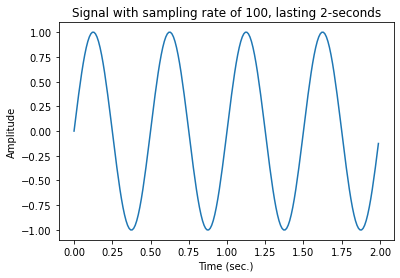

Signal shape (200,)


In [3]:
s1 = signal(
    length_seconds=2, 
    sampling_rate=100, 
    frequencies=[2],  
    plot=True
)

print("Signal shape", s1.shape)

To understand signals, we need to know three important parameters, 1) signal duration, sampling rate, and frequencies.

Duration is a time measurement; it is usually measured in seconds because of the sampling rate. This signal lasts for 2-seconds.

Sampling rate (or sampling frequency) is the average number of samples obtained in one second. This signal has a sampling rate of 100; thus, there are 100 samples in 1-second. Since this is a 2-seconds signal, the signal's total length is 200 (by checking the shape of the data).

Frequency is measured in units of hertz (Hz), which is equal to the number of conciliation per second. This is a 2 Hz sine wave; it conciliation twice in one second, which results in 4 conciliations over 2-seconds.

### Understand deeper: generate signal's code

First, we need to know the number of samples, which is the NumPy array's length. We get the size by multiplying the sampling rate and the duration. 

Next, we generate an array that increments at an equal interval. This will be used as the `x` variable to create the wave.

We create a sine wave with the following function: 

```
np.sin(2*np.pi*frequency*time)
```

We can change `np.sin` to `np.cos` to generate a cosine wave.

See the code in action:

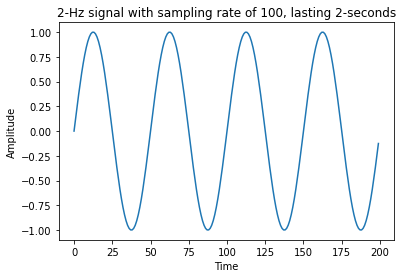

In [4]:
sampling_rate = 100
length_seconds = 2
frequency = 2
npnts = sampling_rate*length_seconds # number of time samples
time = np.arange(0, npnts)/sampling_rate # the `x` in time for each time step to produce the wave
s = np.sin(2*np.pi*frequency*time)
plt.title('2-Hz signal with sampling rate of 100, lasting 2-seconds')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(s)
plt.show()

### Understand deeper: sampling rate

As analog signals are continuous in both time and amplitude, we need to reduce the signal into a discrete-time signal, both in time and amplitude. This signal reduction process is call sampling. The sampling rate defines the number of data points in one second, literally how fast samples are taken.

The sampling rate determines the signal's fidelity. There is a minimum sampling rate for each signal to preserve the information contained in the signal. According to the Nyquist–Shannon sampling theorem, the sampling rate must be at least twice the signal's maximum frequency to allow the signal to be completely represented. This means that if the signal contains high-frequency components, we will need to sample at a higher rate.

In theory, as long as the Nyquist limit, which is half the sample rate, exceeds the highest frequency of the signal being sampled, the original analog signal can be reconstructed without loss. Otherwise, the signal information may not be completely represented, where some of the original signal frequencies may be lost. It will result in audible artifacts known as "aliasing," which are unwanted components in the reconstructed signal.

## Combine multiple frequencies

Let's create another signal with the following parameters:
- duration: 2-seconds
- sampling rate: 100
- frequency: 1 Hz

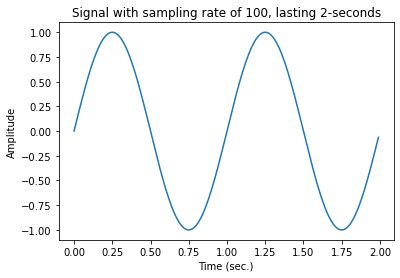

In [5]:
s2 = signal(
    length_seconds=2, 
    sampling_rate=100, 
    frequencies=[1],  
    plot=True
)

We can see it looks very similar to the signal before, but this conciliates only once per second, a total of 2 conciliations. The higher the frequency, there are more conciliations in the signal.

So if you want to measure the signal's strength at any point in time in the signal, you look at the distance between the 0 and the value on the y axis. We can see that the highest amplitude of both signals is 1. 

Now, what happens if you combine these two signals? You get a new signal (s3) that is `s1 + s2`. Because s3 contains two different frequencies, it is no longer the pretty sine wave that we had, like s1 and s2. 

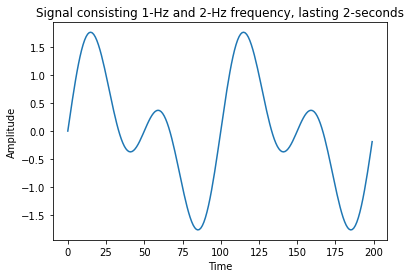

In [6]:
plt.title('Signal consisting 1-Hz and 2-Hz frequency, lasting 2-seconds')
plt.xlabel('Time')
plt.ylabel('Amplitude')
s3 = s1+s2
plt.plot(s3)
plt.show()

What happened was, each time sample is the sum of these two distances. So because these two signals are being added together, when both points in s1 and s2 are high (closer to 1), you see the high points in the new signals greater than 1.


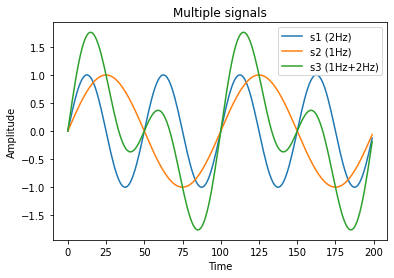

In [7]:
plt.title('Multiple signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(s1, label="s1 (2Hz)")
plt.plot(s2, label="s2 (1Hz)")
plt.plot(s3, label="s3 (1Hz+2Hz)")
plt.legend()
plt.show()

We can add more sound frequencies; the sound wave will get more and more complicated. In fact, these complicated sound waves are what our microphones pick up. Our microphones pick up many different frequencies at any point in time; the final recordings are the sum of all the sound frequencies combined. Other than those sounds that you actually want to record, it also picks up background noise, echoes, and even some electric signal noise.


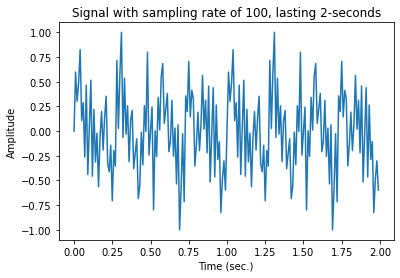

In [8]:
s4 = signal(
    length_seconds=2, 
    sampling_rate=100, 
    frequencies=[4, 7, 11, 30, 55, 140],  
    plot=True
)

In the [Fourier Transform](https://colab.research.google.com/github/jinglescode/python-signal-processing/blob/master/tutorials/Fourier%20Transform.ipynb) tutorial, we learn about how Fourier Transform can take a complex signal like this and decompose it to the frequencies that made it up.

### Understand deeper: what happened when signals are combined

3Blue1Brown did a nice animation to show what happened when multiple waves of various frequencies are combined. Though this video is mainly about Fourier transform, he introduced the signal's time and frequencies in the first few minutes. 

Video: [But what is the Fourier Transform? A visual introduction.
](https://www.youtube.com/watch?v=spUNpyF58BY&vl=en)


In [9]:
#@title 
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## What about noisy signals

As mentioned before, our microphones pick up many different frequencies at any point in time, background noise, unwanted echoes, and electric signal noise. We can add random noise from our generated signal. We do this by adding random values using `np.random.uniform`. In the [following tutorials](https://github.com/jinglescode/python-signal-processing/tree/master/tutorials), we will see how we can denoise these signals.

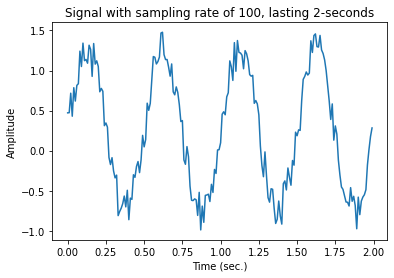

In [10]:
s5 = signal(
    length_seconds=2, 
    sampling_rate=100, 
    frequencies=[2],
    add_noise=0.5,
    plot=True
)

# Endnotes

Thanks for checking out this tutorial. I hope it has been helpful. If you find any mistakes or have any questions, please do not hesitate to [submit an issue](https://github.com/jinglescode/python-signal-processing/issues). Feel free to connect with me on [GitHub](https://github.com/jinglescode) and [LinkedIn](https://www.linkedin.com/in/jingles).

## Extras

`signal` function is used in this repo and it is taken from [splearn.data.generate](https://github.com/jinglescode/python-signal-processing/blob/master/splearn/data/generate.py).

In [11]:
# -*- coding: utf-8 -*-
"""Generate signals
"""
import numpy as np
import matplotlib.pyplot as plt


def signal(length_seconds, sampling_rate, frequencies, func="sin", add_noise=0, plot=False):
    r"""
    Generate a n-D array, `length_seconds` seconds signal at `sampling_rate` sampling rate.
    
    Args:
        length_seconds : float
            Duration of signal in seconds (i.e. `10` for a 10-seconds signal, `3.5` for a 3.5-seconds signal)
        sampling_rate : int
            The sampling rate of the signal.
        frequencies : 1 or 2 dimension python list a floats
            An array of floats, where each float is the desired frequencies to generate (i.e. [5, 12, 15] to generate a signal containing a 5-Hz, 12-Hz and 15-Hz)
            2 dimension python list, i.e. [[5, 12, 15],[1]], to generate a signal with 2 channels, where the second channel containing 1-Hz signal
        func : string, optional, default: sin
            The periodic function to generate signal, either `sin` or `cos`
        add_noise : float, optional, default: 0
            Add random noise to the signal, where `0` has no noise
        plot : boolean, optional, default: False
            Plot the generated signal
    
    Returns:
        signal : n-d ndarray
            Generated signal, a numpy array of length `sampling_rate*length_seconds`
    Usage:
        >>> s = signal(length_seconds=4, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[2], 
        >>>     plot=True
        >>> )
        >>> 
        >>> s = signal(length_seconds=4, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[1,2], 
        >>>     func="cos", 
        >>>     add_noise=0.5, 
        >>>     plot=True
        >>> )
        >>> 
        >>> s = signal(length_seconds=3.5, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[[1,2],[1],[2]],  
        >>>     plot=True
        >>> )
    """
    
    frequencies = np.array(frequencies, dtype=object)
    assert len(frequencies.shape) == 1 or len(frequencies.shape) == 2, "frequencies must be 1d or 2d python list"
    
    expanded = False
    if isinstance(frequencies[0], int):
        frequencies = np.expand_dims(frequencies, axis=0)
        expanded = True
    
    sampling_rate = int(sampling_rate)
    npnts = int(sampling_rate*length_seconds)  # number of time samples
    time = np.arange(0, npnts)/sampling_rate
    signal = np.zeros((frequencies.shape[0],npnts))
    
    for channel in range(0,frequencies.shape[0]):
        for fi in frequencies[channel]:
            if func == "cos":
                signal[channel] = signal[channel] + np.cos(2*np.pi*fi*time)
            else:
                signal[channel] = signal[channel] + np.sin(2*np.pi*fi*time)
    
        # normalize
        max = np.repeat(signal[channel].max()[np.newaxis], npnts)
        min = np.repeat(signal[channel].min()[np.newaxis], npnts)
        signal[channel] = (2*(signal[channel]-min)/(max-min))-1
    
    if add_noise:        
        noise = np.random.uniform(low=0, high=add_noise, size=(frequencies.shape[0],npnts))
        signal = signal + noise

    if plot:
        plt.plot(time, signal.T)
        plt.title('Signal with sampling rate of '+str(sampling_rate)+', lasting '+str(length_seconds)+'-seconds')
        plt.xlabel('Time (sec.)')
        plt.ylabel('Amplitude')
        plt.show()
    
    if expanded:
        signal = signal[0]
        
    return signal